# Python script for volcanoes Holocene

Import data from: http://volcano.si.edu/list_volcano_holocene.cfm

Save the downloaded file as a csv-file.

Use TextWrangler's Find function to replace commas (,) with periods (.).

#### First import modules:

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import additional modules:**

*Import **Basemap** in order to plot onto a map. First open a new Terminal window, and type: conda install Basemap. After installation you can import it.*

*Import **colors** for scatter plots and colorbar.*

*Import **cm** for cmap.*

*Import **plt.rcParams['figure.figsize']** to assign figure size.*

*Import **inset_axes** for positioning a background box for the legend.*

*Import **Rectangle** for making a background box for the legend.*

In [83]:
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib import cm
plt.rcParams['figure.figsize'] = [6,12]
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle

#### Set path to data:

In [84]:
fp = "/Users/Nellimetiainen/Desktop/GVP_Volcano_List_Holocene.csv"

### File a1, has new columns for volcano type codes and rock type codes for South America data

In [85]:
fp = "/Users/Nellimetiainen/Desktop//a1.csv"

#### Set dataframe:

In [86]:
dataFrame = pd.read_csv(fp, sep=';', skiprows=1, encoding='latin 1')

Check the column names to select useful data: 

In [87]:
dataFrame.columns

Index(['Volcano Number', 'Volcano Name', 'Country',
       'South America primary volcano type', 'Primary Volcano Type',
       'Activity Evidence', 'Last Known Eruption', 'Region', 'Subregion',
       'Latitude', 'Longitude', 'Elevation (m)', 'SA rock type',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')

In [88]:
dataFrame.dtypes

Volcano Number                          int64
Volcano Name                           object
Country                                object
South America primary volcano type    float64
Primary Volcano Type                   object
Activity Evidence                      object
Last Known Eruption                    object
Region                                 object
Subregion                              object
Latitude                              float64
Longitude                             float64
Elevation (m)                           int64
SA rock type                          float64
Dominant Rock Type                     object
Tectonic Setting                       object
dtype: object

In [89]:
dataFrame['Latitude']

0        2.095139
1       45.775000
2        1.761806
3       38.870000
4        1.809028
5        1.754167
6       41.730000
7       40.827000
8       40.821000
9       40.730000
10       1.658333
11      38.789000
12      38.638000
13       1.617361
14      38.404000
15      37.748000
16       1.542361
17      36.770000
18      39.284000
19      37.615000
20      36.699000
21      36.404000
22      36.586000
23      36.671000
24       1.623611
25      37.667000
26       1.592361
27       1.600694
28      38.537000
29      38.531000
          ...    
1410   -72.670000
1411   -74.350000
1412   -76.830000
1413   -78.500000
1414   -77.530000
1415   -78.250000
1416   -76.050000
1417   -75.800000
1418   -77.170000
1419   -73.430000
1420   -75.800000
1421   -76.280000
1422   -74.330000
1423   -68.850000
1424   -63.001000
1425   -62.100000
1426   -62.061000
1427   -63.579000
1428   -65.030000
1429   -59.442000
1430   -59.017000
1431   -58.445000
1432   -57.800000
1433   -57.080000
1434   -56

#### Select wanted columns and set new dataframe:

In [90]:
select_cols = ['Volcano Number','Volcano Name','Country','South America primary volcano type','Primary Volcano Type','Activity Evidence','Last Known Eruption', 'Latitude','Longitude','Elevation (m)','SA rock type','Dominant Rock Type','Tectonic Setting']
selected_data = dataFrame[select_cols]

##### Check datatypes:

In [91]:
selected_data.dtypes

Volcano Number                          int64
Volcano Name                           object
Country                                object
South America primary volcano type    float64
Primary Volcano Type                   object
Activity Evidence                      object
Last Known Eruption                    object
Latitude                              float64
Longitude                             float64
Elevation (m)                           int64
SA rock type                          float64
Dominant Rock Type                     object
Tectonic Setting                       object
dtype: object

Print latitude/longitude to check values look as they should:

In [92]:
print(dataFrame["Longitude"])

0         0.309028
1         0.150694
2         0.120139
3        -4.020000
4         0.477083
5         0.522917
6         0.504861
7         0.679861
8         0.879167
9         1.164583
10        0.640972
11        0.772917
12       15.064000
13        1.231250
14        1.251389
15        1.277083
16        0.504861
17        0.501389
18        0.860417
19        1.191667
20       24.439000
21       25.396000
22        1.136111
23        1.134722
24        1.202778
25        1.379167
26        1.428472
27        1.456250
28       34.621000
29       35.447000
           ...    
1410      6.878472
1411      6.838194
1412    163.000000
1413      6.828472
1414      6.970139
1415      6.814583
1416   -136.000000
1417   -132.330000
1418   -126.880000
1419   -126.670000
1420   -115.830000
1421   -112.080000
1422    -99.420000
1423    -90.580000
1424    -60.652000
1425    -57.930000
1426    -56.717000
1427    -55.780000
1428    -60.050000
1429    -27.225000
1430    -26.533000
1431    -26.

#### See all the mean, std, min, percentile and max values for float type data:

In [93]:
selected_data.describe()

,Volcano Number,South America primary volcano type,Latitude,Longitude,Elevation (m),SA rock type
count,1440.000000,189.000000,1440.000000,1440.000000,1440.000000,180.000000
mean,296924.069444,2.634921,6.244237,1.381607,1687.407639,3.000000
std,48882.578144,2.559722,29.690730,102.996540,1584.242654,0.642968
min,210010.000000,1.000000,-78.500000,-179.970000,-5700.000000,2.000000
25%,261147.500000,1.000000,-7.166500,-78.447250,731.000000,3.000000
50%,300046.000000,1.000000,0.787847,1.934028,1480.500000,3.000000
75%,342140.250000,4.000000,32.791750,110.958000,2357.000000,3.000000
max,390847.000000,11.000000,85.608000,179.075000,6879.000000,4.000000


# Plot data

[Simple test plots](Test plots volcanoes.ipynb)

### Select data by coordinates

Select wanted data for South American volcanoes by determining coordinates: (Make sure to use select_lat instead of dataFrame for determining longitude.)

In [94]:
select_lat = dataFrame.loc[(dataFrame['Latitude'] <= 7.995) & (dataFrame['Latitude'] >= -55.361)]
select_lon = select_lat.loc[(select_lat['Longitude'] <= -60.175) & (select_lat['Longitude'] >= -84.982)]
print(select_lon)

      Volcano Number              Volcano Name  \
1128          344140              Azul. Volcan   
1133          345033                    Arenal   
1134          345034                  Platanar   
1135          345040                      Poas   
1136          345050                     Barva   
1137          345060                     Irazu   
1139          346010                      Baru   
1140          346030                 Valle. El   
1141          351011                   Romeral   
1142          351012              Bravo. Cerro   
1143          351020          Ruiz. Nevado del   
1144          351021              Santa Isabel   
1145          351030        Tolima. Nevado del   
1146          351040                    Machin   
1147          351050         Huila. Nevado del   
1148          351060                    Purace   
1149          351061                    Sotara   
1150          351062                   Petacas   
1151          351070                Dona Juana   


# Main plot

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


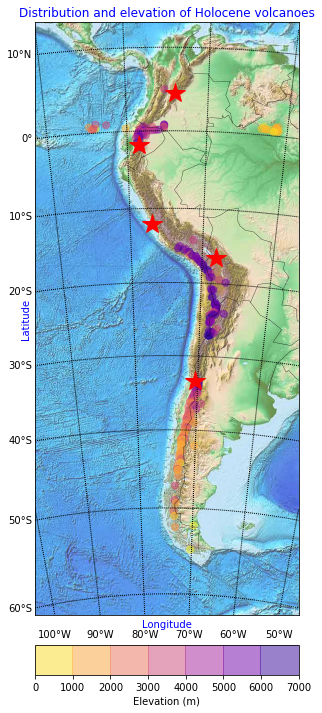

In [101]:
# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='lcc',
            resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["Elevation (m)"], cmap='plasma_r', alpha=0.5)

# Set grid for parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,10.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Distribution and elevation of Holocene volcanoes', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma_r', 7)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(0, 7000, 8)
# Set min and max values with clim:
plt.clim(0, 7000)
# Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = m.colorbar(cmap=cmap, location='bottom',pad="5%", boundaries=bounds)
# Colorbar title:
cbar.set_label('Elevation (m)')

# Plot capital cities on map as red stars:

# Plot red star on the location of Lima:
lat, lon = -12.043, -77.028 
# Convert to map projection coords. Note that lon,lat can be scalars, lists or numpy arrays:
xpt,ypt = m(lon,lat)
# Convert back to lat/lon:
lonpt, latpt = m(xpt,ypt,inverse=True)
# plot a red star there:
m.plot(xpt,ypt,'r*', markersize= 20)  

# Plot red star on Bogota:
lat, lon = 04.624, -74.054 
xpt,ypt = m(lon,lat)
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'r*', markersize= 20)  

# Plot red star on Quito:
lat, lon = -01.80, -78.48
xpt,ypt = m(lon,lat)
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'r*', markersize= 20)

# Plot red star on La Paz:
lat, lon = -16.48, -68.11
xpt,ypt = m(lon,lat)
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'r*', markersize= 20)  

# Plot red star on Santiago, and label it as such:
lat, lon = -33.45, -70.40 
xpt,ypt = m(lon,lat)
lonpt, latpt = m(xpt,ypt,inverse=True)
m.plot(xpt,ypt,'r*', markersize= 20)

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Save figure as picture:
plotFile = str('Elevation') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures:
#plt.close("all")

# Display image:
plt.show()

# Volcanoes scatter map and bars side by side

/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/Nellimetiainen/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


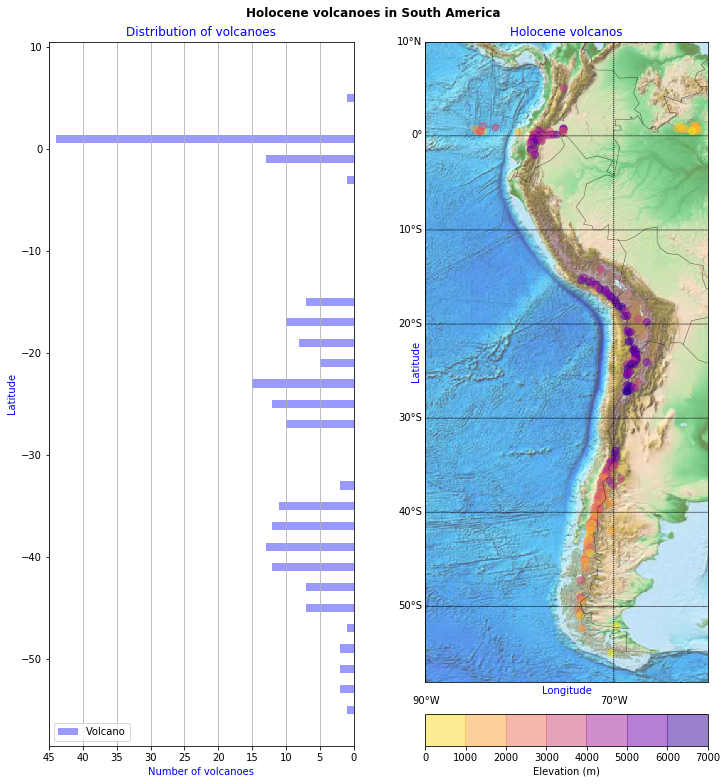

In [100]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rcParams['figure.figsize'] = [12,12]

# Set path for saving images:
savepath="/Users/Nellimetiainen/Desktop/a/"

## Set up for bar plot:
# Make a bar every 2 degrees latitude:
barIncrement = 2
barBins= np.arange(8, -56, -barIncrement)
# Determine the length of bars:
numBars = len(barBins)
# Separate different depth earthquakes:
volcanoCount = np.zeros(numBars)

# Set up figure for subplots:
f, ax = plt.subplots(nrows=1, ncols=2)

# Title for whole figure:
plt.suptitle('Holocene volcanoes in South America', fontweight='bold')

# Make bar plot (set axis, load values):
for i in range(numBars):
            numVolcano = select_lon['Elevation (m)'].loc[(select_lon['Latitude'] > barBins[i]-barIncrement) & (select_lon['Latitude'] <= barBins[i])].count()
            volcanoCount[i] = volcanoCount[i] + numVolcano
            
# Plot bars:
ax[0].barh(y=barBins-(barIncrement/2), width=volcanoCount, label='Volcano', color='b', alpha = 0.4)

# Set limits:
totalCount = volcanoCount
ax[0].set_xlim(totalCount.max()+1, 0)
ax[0].set_xticks(np.arange(0,50,5))

# Add grid:
ax[0].grid(axis='x')

# Add titles:
ax[0].set_title('Distribution of volcanoes', color='blue')
ax[0].set_xlabel('Number of volcanoes', color='blue')
ax[0].set_ylabel('Latitude', color='blue')

# Add legend:
ax[0].legend(fontsize='medium', loc = 3)

# Set basemap:
m = Basemap(width=4000000,height=9000000,projection='cyl',
resolution='c',lat_1=-20,lat_2=-30,lat_0=-25,lon_0=-75,llcrnrlat=-58,urcrnrlat=10,
llcrnrlon=-90,urcrnrlon=-60)

# Set boundaries / borders / coastline:
#m.drawmapboundary(linewidth=0.1)
m.drawcountries(linewidth=0.3)
#m.drawcoastlines(linewidth=0.4)

# Set topography map + color intensity:
#m.shadedrelief()
m.etopo(alpha=0.70)

# Make scatter plot, s=size, c=color, cmap=colorscheme for color bar, alpha is opaqueness:
lon1,lat1 = m(select_lon["Longitude"].values, select_lon["Latitude"].values)
plot1 = plt.scatter(lon1, lat1, s=50, c=select_lon["Elevation (m)"], cmap='plasma_r', alpha=0.5)

# Set grid and parallels and meridians:
x, y = m(*np.meshgrid(lon1,lat1))
parallels = np.arange(-80.,81.,10.)
meridians = np.arange(10.,351.,20.)

# Set labels = [left,right,top,bottom]:
m.drawparallels(parallels,labels=[True,False,True,True])
m.drawmeridians(meridians,labels=[False,False,False,True])

# Add titles:
plt.title ('Holocene volcanos', color='blue')
plt.xlabel('Longitude', color='blue')
plt.ylabel('Latitude', color='blue')

# Specify colorbar:
cmap = cm.get_cmap('plasma_r', 7)
# Set clear boundaries for values in colorbar with bounds:
bounds = np.linspace(0, 7000, 8)
# Set min and max values with clim:
plt.clim(0, 7000)
# Make colorbar - specify where it's dispalyed with location, pad = space between figure and bar, include boundaries:
cbar = m.colorbar(cmap=cmap, location='bottom',pad="5%", boundaries=bounds)
# Colorbar title:
cbar.set_label('Elevation (m)')

# Make plot fill whole figure:
#plt.tight_layout(h_pad=0)

# Make space between main title and plots:   
plt.subplots_adjust(top=0.94)
    
# Save figure as picture:
plotFile = str('South America primary volcano type') + ".png"
plt.savefig(savepath+plotFile)

# Save memory and avoid computer crashing by not opening all the figures in the loop:
plt.show()
#plt.close("all")

# Volcanic rock types

[Volcanic rock type models](Volcanic rock types SA.ipynb)

# Viewing volcano types and volcanic features separately

[Volcano types and volcanic features](Volcano types SA.ipynb)

# Testing projections

[Different projection types](Testing projections.ipynb)